# About Yulu

Yulu is India’s leading ***micro-mobility service provider***, which ***offers unique vehicles for the daily commute***. Starting off as a ***mission to eliminate traffic congestion in India***, Yulu provides the safest commute solution through a ***user-friendly mobile app to enable shared, solo and sustainable commuting.***

***Yulu zones*** are located at all the appropriate locations (including ***metro stations, bus stands, office spaces, residential areas, corporate offices, etc***) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want ***to understand the factors affecting the demand for these shared electric cycles in the Indian market***.

# Problem Statement

Company wants to know about :
 - **Which variables are significant in predicting the demand for shared electric cycles in the Indian market?**

 - **How well those variables describe the electric cycle demands**

# Analysis

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [286]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 15.8MB/s]


In [287]:
data = pd.read_csv("yulu.csv")

In [288]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [289]:
data.shape

(10886, 12)

##Data Characteristics



 **Data attributes are :**

* *Datetime* : datetime
* *Season* : season (1: spring, 2: summer, 3: fall, 4: winter)
* *Holiday* : whether day is a holiday or not.
* *Workingday* : if day is either holiday or weekend then 0 otherwise 1 .
* *Weather* :

    1. Clear, Few clouds, partly cloudy, partly cloudy

    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
    Scattered clouds

    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


* *Temp* : Temperature in Celsius
* *Atemp* : Feeling temperature in Celsius
* *Humidity* : Humidity
* *Windspeed* : Wind speed
* *Casual* : Count of casual users
* *Registered* : Count of registered users
* *Count* : Count of total rental bikes including both casual and registered


 **Data includes 12 attributes with a total of 10886 records.**

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [291]:
data['datetime'] = pd.to_datetime(data['datetime']) #Converting the datetime object to datetime

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [293]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Data type of each attribute are :**
  
  * *DateTime* : Datetime
  * *Float* : Temp , ATemp , Windspeed
  * *Integer* : Season , Holiday , Workingday , Weather , Humidity ,Casual , Registered , Count
  
**NOTE** : __All the attributes are non-null ,so we don't need to clean the data__

`Categorical Data` are **Datetime** , **Season** , **Holiday** ,**Workingday** and **Weather**.

`Quantitative Data` are **Temp** , **ATemp** , **Windspeed**, **Humidity**,
**Casual** , **Registered** , **Count**

##Descriptive Analaysis

In [294]:
data.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454




| Observation | Range |Minimum|Maximum | Mean/Average |
|---|---|---|---|---|
| DateTime | 01-01-2011 : 19-12-2012  |01-01-2011|19-12-2012 | NA |
| Season | 1-4 |1|4 |2.506 |
| Holiday | 0-1 |0|1| 0.028 |
| Workingday | 0-1 |0|1|0.681 |
| Weather | 1-4 |1|4| 1.418 |
| Temp | 0.82 - 41 |0.82|41| 20.23 |
| ATemp | 0.76-45.55 |0.76|45.55| 23.65 |
| Humidity | 0-100 |0|100| 61.88 |
| Windspeed | 0-57 |0|57| 12.79 |
| Casual |0-367 |0|367| 36.02 |
| Registered | 0-886 |0|886| 155.55 |
| Count | 1-977 |1|977| 191.57|

In [295]:
data['datetime'].max()-data['datetime'].min()

Timedelta('718 days 23:00:00')

This data is of 718 days

## Univariate Analysis

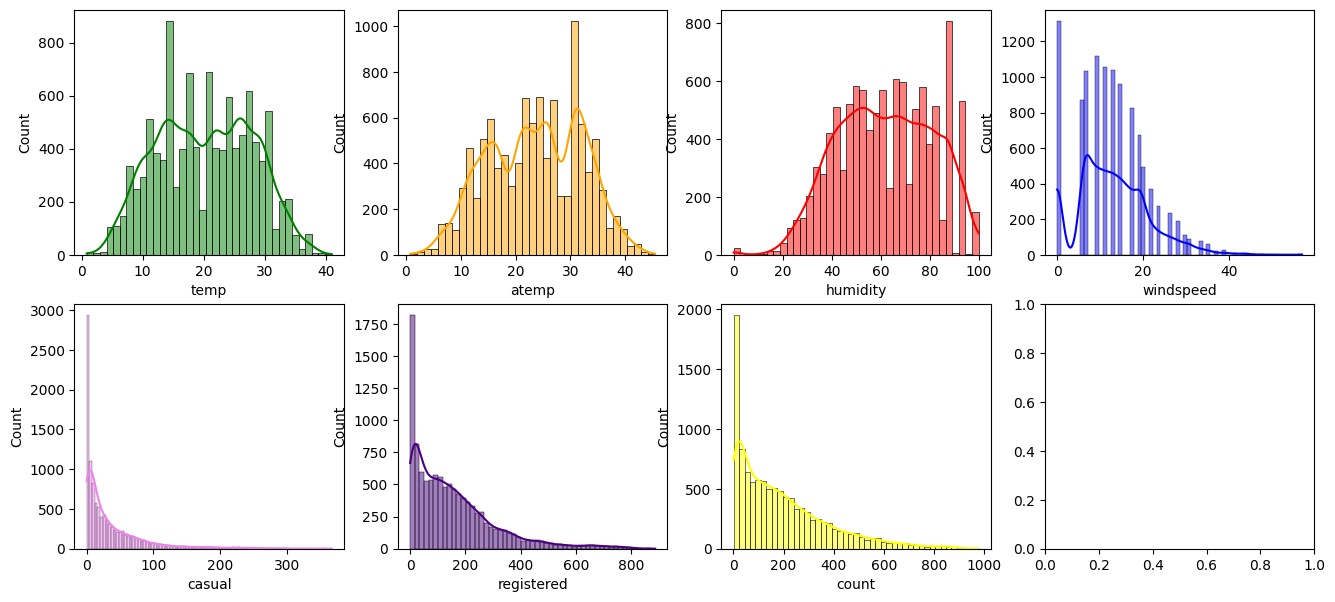

In [296]:
# understanding the distribution for numerical variables

fig, axis = plt.subplots(nrows=2,ncols=4,figsize=(16,7))
sns.histplot(data['temp'],ax=axis[0,0],color='green',kde='true')
sns.histplot(data['atemp'],ax=axis[0,1],color='orange',kde='true')
sns.histplot(data['humidity'],ax=axis[0,2],color='red',kde='true')
sns.histplot(data['windspeed'],ax=axis[0,3],color='blue',kde='true')
sns.histplot(data['casual'],ax=axis[1,0],color='violet',kde='true')
sns.histplot(data['registered'],ax=axis[1,1],color='indigo',kde='true')
sns.histplot(data['count'],ax=axis[1,2],color='yellow',kde='true')
plt.show()


__Observation :__
* More cutomers are there when the temperature is between 10 to 30
* As the windspeed increases , there is a downfall in the number of customers.
* Casual , Registered and Count decreases in a logrithmic fashion

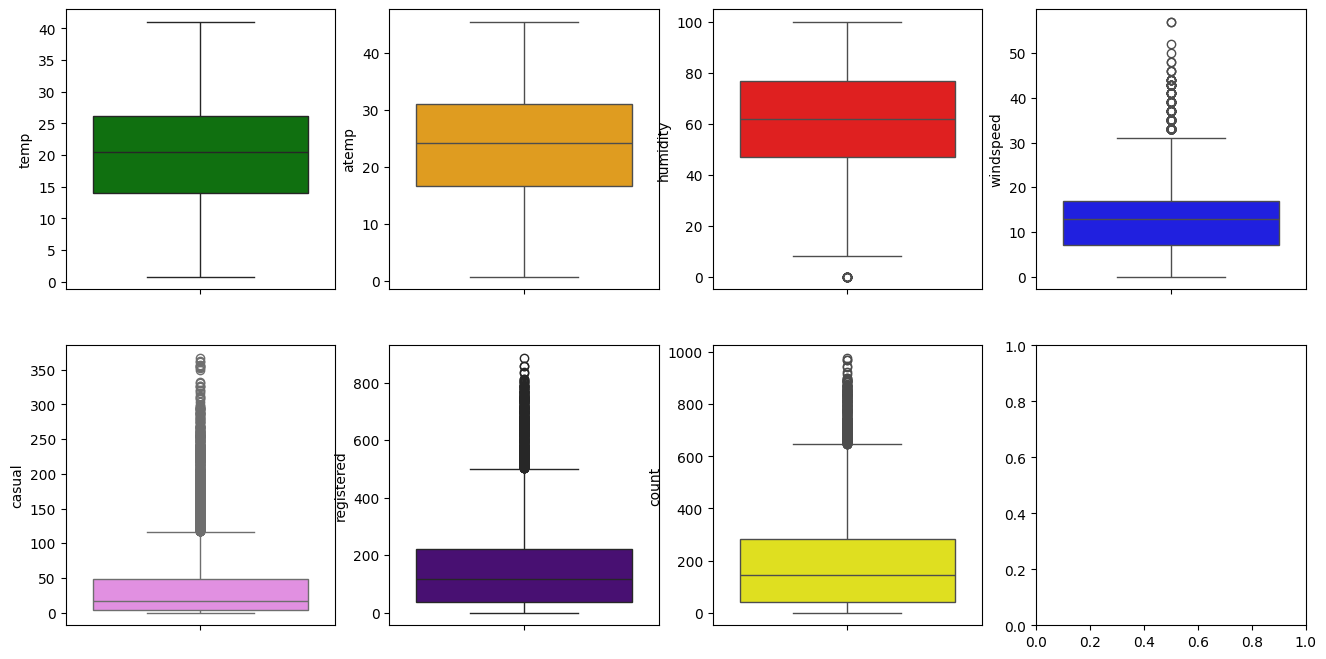

In [297]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2,ncols=4,figsize=(16,8))
sns.boxplot(data['temp'],ax=axis[0,0],color='green')
sns.boxplot(data['atemp'],ax=axis[0,1],color='orange')
sns.boxplot(data['humidity'],ax=axis[0,2],color='red')
sns.boxplot(data['windspeed'],ax=axis[0,3],color='blue')
sns.boxplot(data['casual'],ax=axis[1,0],color='violet')
sns.boxplot(data['registered'],ax=axis[1,1],color='indigo')
sns.boxplot(data['count'],ax=axis[1,2],color='yellow')
plt.show()

__Observation :__
* There are a lot of outliers of casual , registered and count

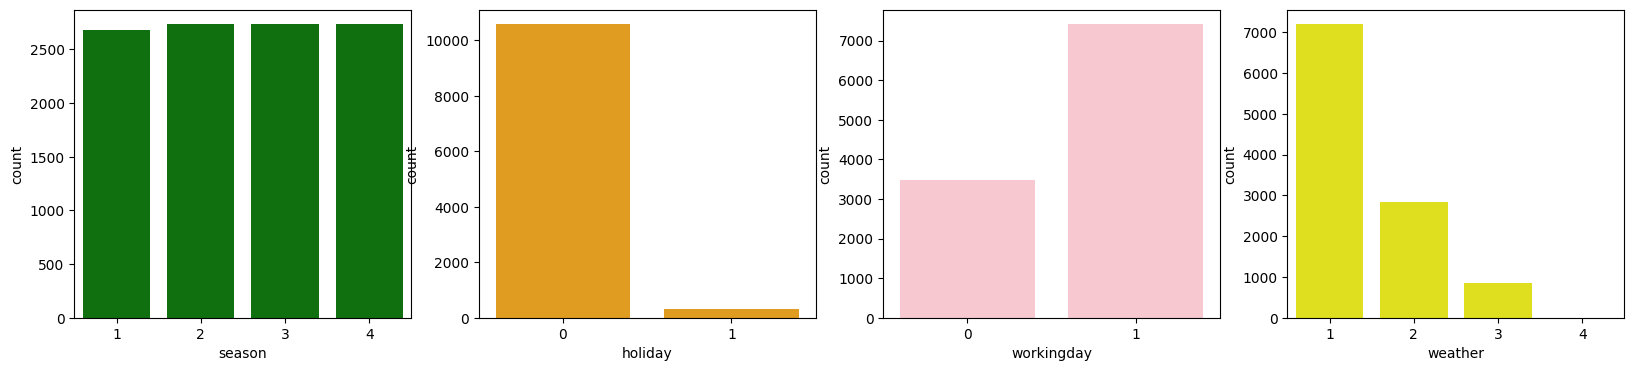

In [298]:
# understanding the distribution for categorical variables

fig, axis = plt.subplots(nrows=1,ncols=4,figsize=(20,4))
sns.countplot(data=data,x='season',ax=axis[0],color='green')
sns.countplot(data=data,x='holiday',ax=axis[1],color='orange')
sns.countplot(data=data,x='workingday',ax=axis[2],color='pink')
sns.countplot(data=data,x='weather',ax=axis[3],color='yellow')
plt.show()

__Observation:__
* Seems like there's no impact of season on usage of bikes.
* On holidays ,people are not at all using yulu.
* More than 60% of people seem to use it on a working day .
* As the weather goes from clear to cloudy , people tend to use it less.

## Bi-Variate Analysis

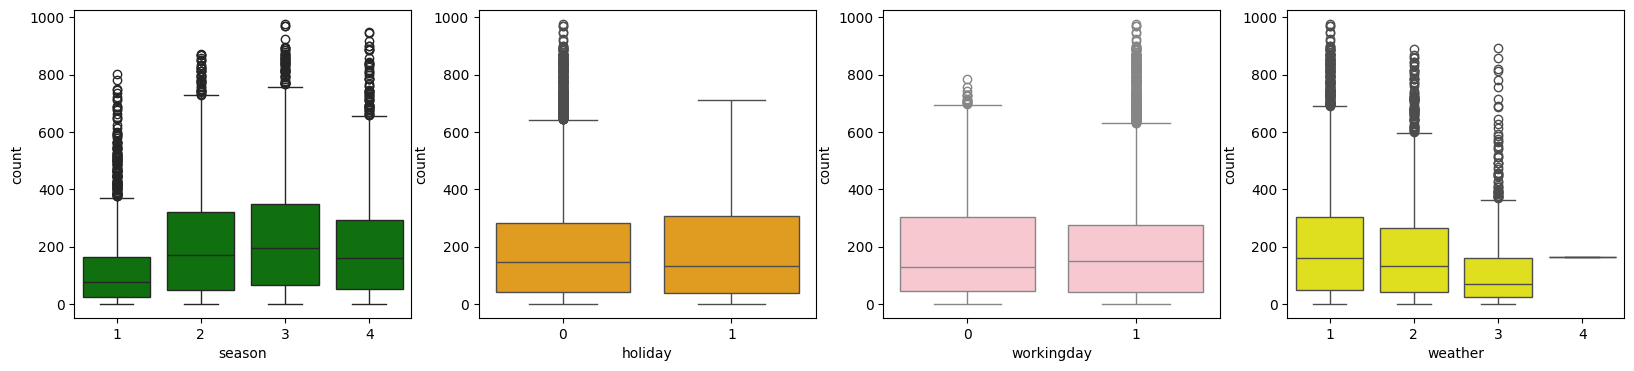

In [299]:
# Categorical Data vs Count using Box Plot
fig, axis = plt.subplots(nrows=1,ncols=4,figsize=(20,4))
sns.boxplot(data=data,x='season',y='count',ax=axis[0],color='green')
sns.boxplot(data=data,x='holiday',y='count',ax=axis[1],color='orange')
sns.boxplot(data=data,x='workingday',y='count',ax=axis[2],color='pink')
sns.boxplot(data=data,x='weather',y='count',ax=axis[3],color='yellow')
plt.show()

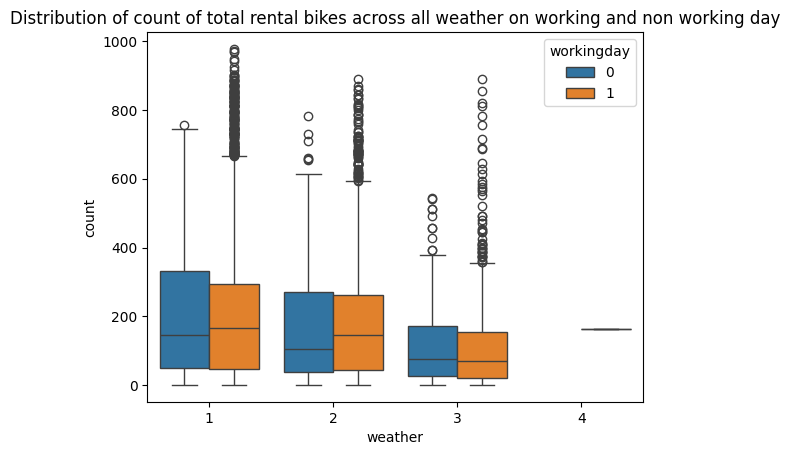

In [300]:
# Data of count of rental bikes in all weather condition in working and non working days.
plt.title('Distribution of count of total rental bikes across all weather on working and non working day')
sns.boxplot(data = data, x = 'weather', y = 'count', hue = 'workingday')
plt.show()

 __Observation:__

 The count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather.

 Very less number of rental bikes were rented when it was extreme weather conditions

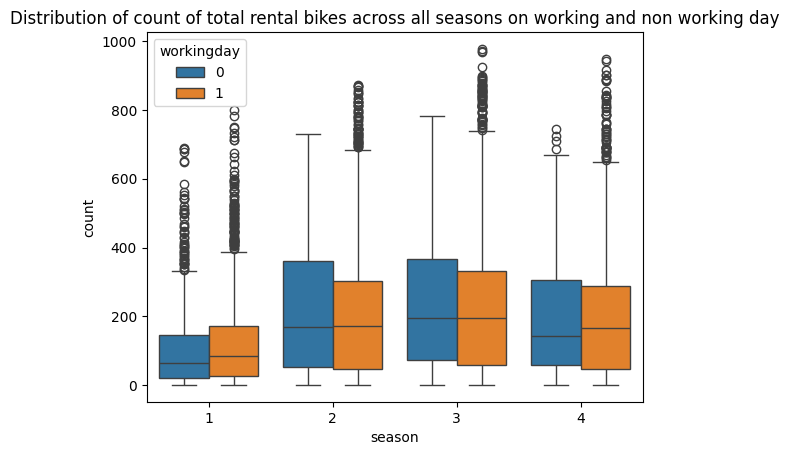

In [301]:
# Data of count of rental bikes in all seasons in working and non working days.
plt.title('Distribution of count of total rental bikes across all seasons on working and non working day')
sns.boxplot(data = data, x = 'season', y = 'count', hue = 'workingday')
plt.show()

__Observation:__

The count of total rental bikes is higher in the season 2 and 3 ,i.e (summer and fall) followed by winter and spring.Spring has the lowest count of rental bikes.

No significant difference can be seen in working and non working day here

## Hypothesis Testing :

### Is there any effect of working Day on number of bikes rented ?

In [302]:
data.groupby('workingday')['count'].describe() #Count of rental bikes of workin and non working day

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


__Observation:__
* Working day count is double the non-working day count.
* Standard deviation is also more for working day.

[]

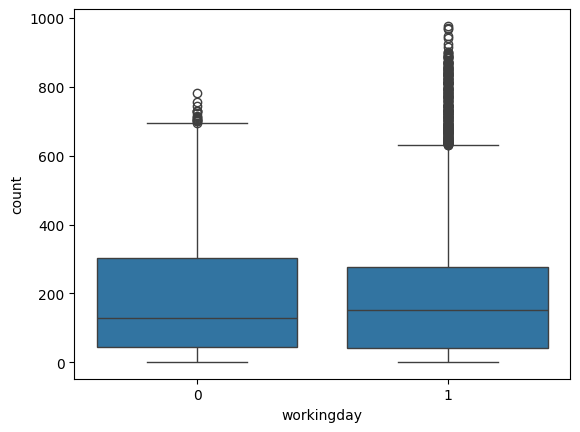

In [303]:
sns.boxplot(data = data, x = 'workingday', y = 'count') # ploting the boxplot for workind and non working day count
plt.plot()

***STEP-1*** : Set up Null Hypothesis ( H0 )

---



  * **Null Hypothesis ( H0 )** - Working Day does not have any effect on the number of bikes rented.

  * **Alternate Hypothesis ( H1 )** - Working Day has some effect on the number of bikes rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Visual test for normal distribution.
* Shapiro test for normal distribution



***STEP-3***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-4***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Can't reject H0
  2.   **p-val < alpha** : Reject H0

#### Visual Test for normal Distribution

[]

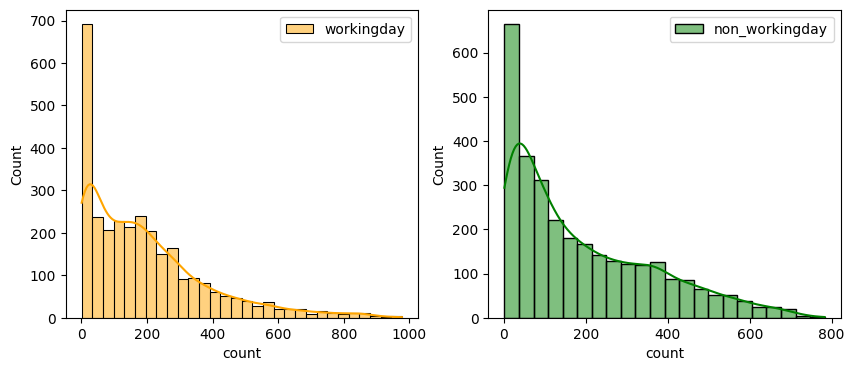

In [304]:
# Histplot to see if data has the normal Distribution
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.loc[data['workingday'] == 1, 'count'].sample(3000), color = 'orange', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(data.loc[data['workingday'] == 0, 'count'].sample(3000), color = 'green', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

__Observation:__
* Seems like graph doesn't follow normal distribution

#### Shapiro test for normal distribution

H0 : **follows normal distribution**

H1 : **does not follow normal distribution**

alpha = 0.05


In [305]:
#Shapiro test for checking the normal distribution
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['workingday'] == 0, 'count'].sample(3000))
if p_value < 0.05:
  print("Reject the null hypothesis , graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , graph follows normal distribution")

Reject the null hypothesis , graph does not follows normal distribution


In [306]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['workingday'] == 1, 'count'].sample(3000))
if p_value < 0.05:
  print("Reject the null hypothesis , graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , graph follows normal distribution")

Reject the null hypothesis , graph does not follows normal distribution


#### QQ Plot test for normal

In [307]:
from statsmodels.graphics.gofplots import qqplot


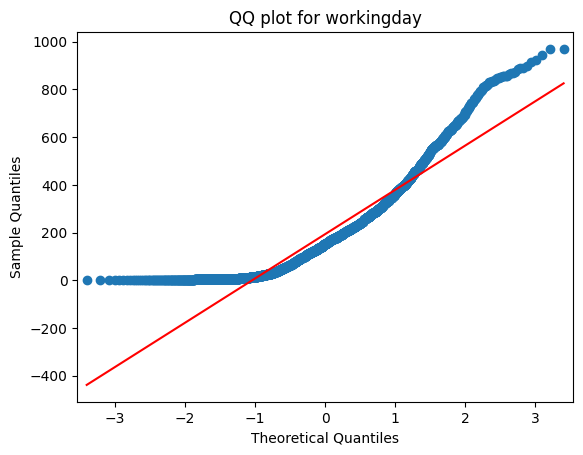

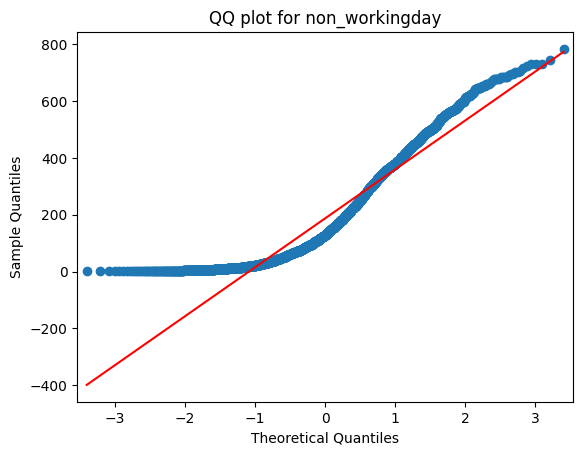

In [308]:
# QQ plot to check the normal distribution
qqplot(data.loc[data['workingday'] == 1, 'count'].sample(3000),line='s')
plt.title('QQ plot for workingday')

qqplot(data.loc[data['workingday'] == 0, 'count'].sample(3000),line='s')
plt.title('QQ plot for non_workingday')
plt.show()

__Observation:__
* It can be concluded that this is not a normal distribution.


#### Conclusion on Distribution


**Assumptions of ANNOVA has failed , it's not a normal distribution**

**We will perform log transformation to make it normal**

#### Log Transformation

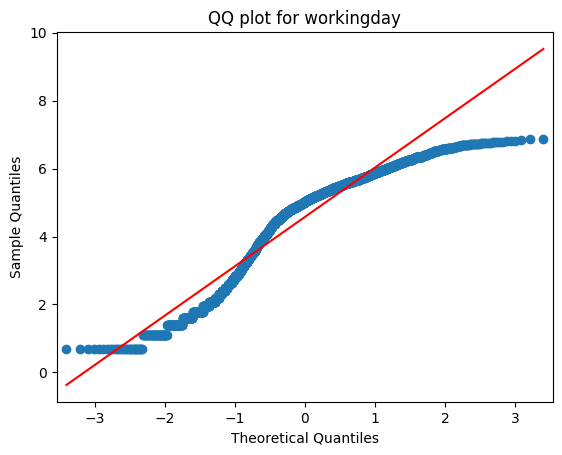

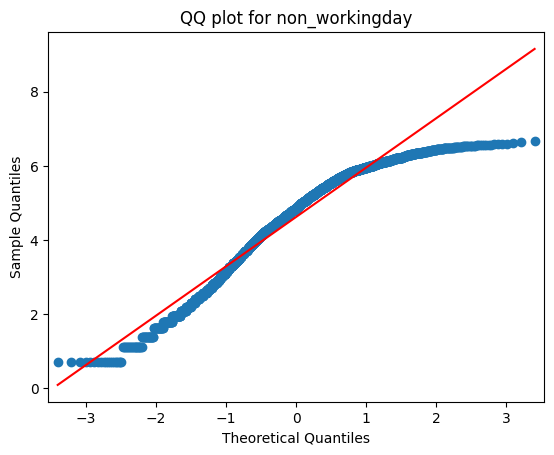

In [309]:
# Applying log transformation and then qq plot
sample_data_1 = data.loc[data['workingday'] == 1, 'count'].sample(3000)
log_transformed_data_1 = np.log1p(sample_data_1)
sample_data_0 = data.loc[data['workingday'] == 0, 'count'].sample(3000)
log_transformed_data_0 = np.log1p(sample_data_0)


qqplot(log_transformed_data_1,line='s')
plt.title('QQ plot for workingday')

qqplot(log_transformed_data_0,line='s')
plt.title('QQ plot for non_workingday')
plt.show()

__Observation__
* It is also not able to make data normal
* So we will apply yeo johnson transformation

#### Yeo-Johnson Transformation

Text(0.5, 1.0, 'QQ plot for workingday')

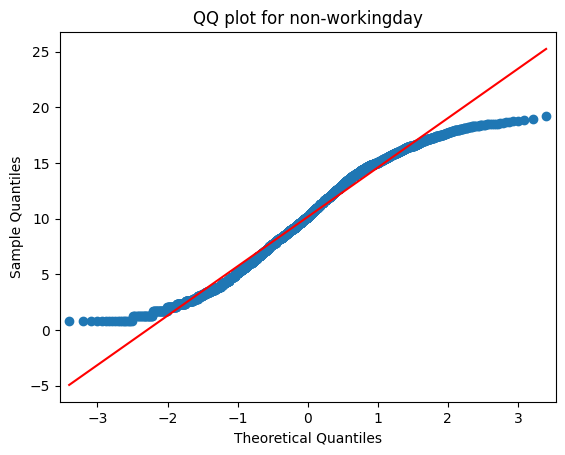

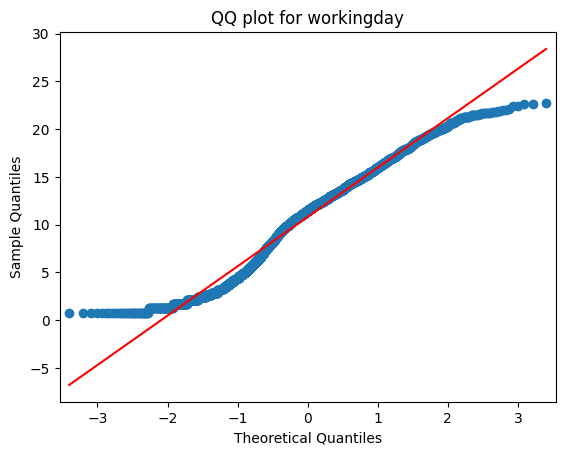

In [310]:
# Applying Yeo-Johnson transformation and then qq plot
from scipy.stats import yeojohnson
yeo_transformed_0,lambda_0=yeojohnson(data.loc[data['workingday']==0,'count'].sample(3000))
yeo_transformed_1,lambda_1=yeojohnson(data.loc[data['workingday']==1,'count'].sample(3000))

qqplot(yeo_transformed_0,line='s')
plt.title('QQ plot for non-workingday')

qqplot(yeo_transformed_1,line='s')
plt.title('QQ plot for workingday')



#### Krushkal Wallis Test

In [311]:
# Applying krushkal wallis test to test the hypothesis
from scipy.stats import kruskal

In [312]:
stat, p_value = kruskal(data.loc[data['workingday'] == 1, 'count'].sample(3000),data.loc[data['workingday'] == 0, 'count'].sample(3000))
if p_value < 0.05 :
  print ("Reject the null hypothesis . So, working Day has some effect on the number of bikes rented ")
else :
  print ("Accept the null hypothesis. So , working Day has no effect on the number of bikes rented ")


Accept the null hypothesis. So , working Day has no effect on the number of bikes rented 


#### 2 Sample T-Test on transformed data

In [313]:

from scipy.stats import ttest_ind

In [314]:
## Applying 2 Sample T-Test to test the hypothesis
test_stat,p_value = ttest_ind(yeo_transformed_0,yeo_transformed_0)
if(p_value<0.05):
  print("Reject the null hypothesis .So, working Day has some effect on the number of bikes rented")
else:
  print("Accept the null hypothesis .So, working Day has some effect on the number of bikes rented")

Accept the null hypothesis .So, working Day has some effect on the number of bikes rented


#### Conclusion

**Since we had to transform the data a lot to apply ttest so we can't confirm about the accuracy of this.**

**So we will consider the krushkal wallis test , and hence There's no effect on the number of bikes rented**

In [315]:
data.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


__Observation:__
* There's a significant difference in the number of bikes rented on holiday and non-holiday

[]

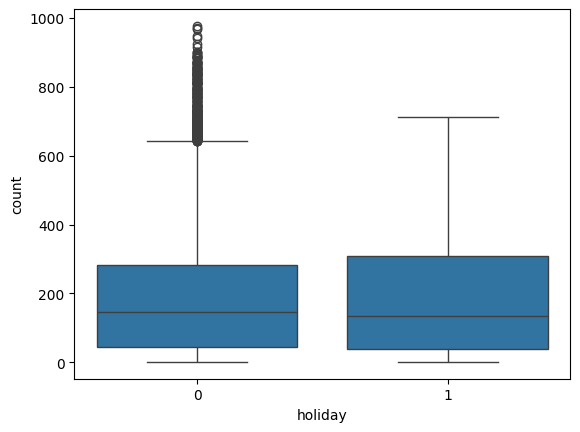

In [316]:
sns.boxplot(data = data, x = 'holiday', y = 'count')
plt.plot()

***STEP-1*** : Set up Null Hypothesis ( H0 )

---



  * **Null Hypothesis ( H0 )** - Holiday does not have any effect on the number of bikes rented.

  * **Alternate Hypothesis ( H1 )** - Holiday has some effect on the number of bikes rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Visual test for normal distribution.




***STEP-3***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-4***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Can't reject H0
  2.   **p-val < alpha** : Reject H0

### Is the number of bikes rented is similar or different in different season ?

In [317]:
data.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


<Axes: xlabel='season', ylabel='count'>

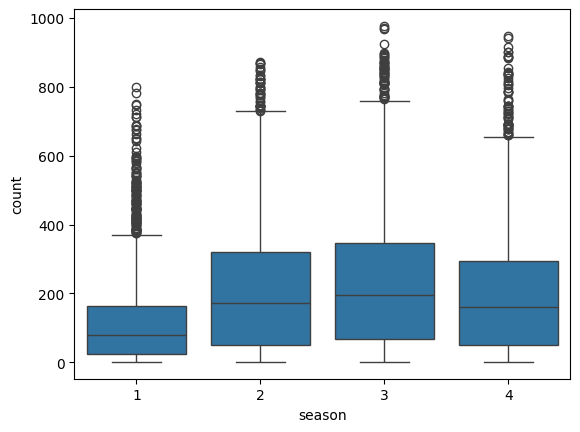

In [318]:
sns.boxplot(data=data,x='season',y='count')

***STEP-1*** : Set up Null Hypothesis ( H0 )

---
* **Null Hypothesis ( H0 )** - Mean of bikes rented is same for season 1,2,3 and 4.

* **Alternate Hypothesis ( HA )** - Mean of bikes rented is different for season 1,2,3 and 4.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Visual test for normal distribution.
* Shapiro test for normal distribution



***STEP-3*** : Compute the p-value and fix value of alpha.

---

We will be computing the multiple sample anova-test p-value using the **f_oneway** function using scipy.stats.
We set our alpha to be **0.05**

***STEP-4*** : Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

#### Visual Test for normal Distribution

[]

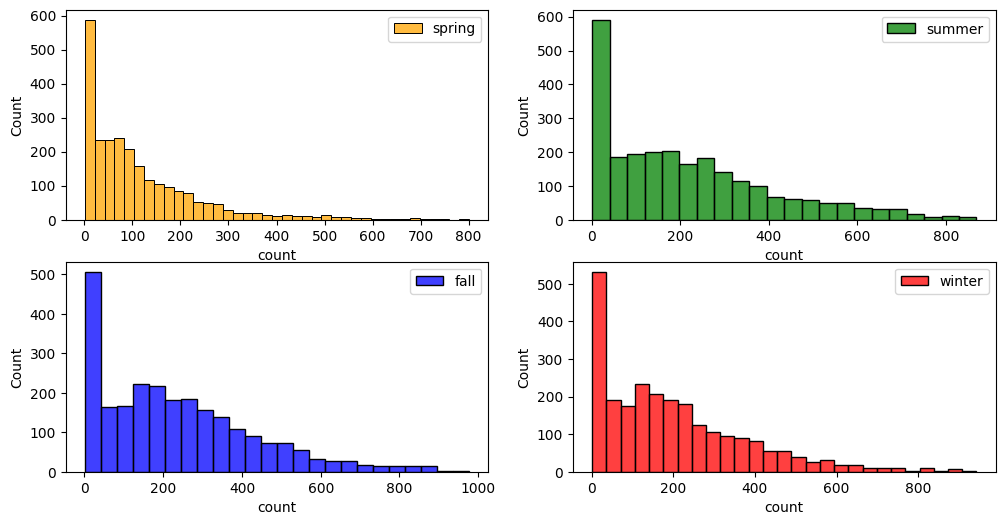

In [319]:
# Histplot to see if data has the normal Distribution

plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data.loc[data['season'] == 1, 'count'].sample(2500), color = 'orange', label = 'spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(data.loc[data['season'] == 2, 'count'].sample(2500),color = 'green',  label = 'summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(data.loc[data['season'] == 3, 'count'].sample(2500),color = 'blue',  label = 'fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(data.loc[data['season'] == 4, 'count'].sample(2500),color = 'red',  label = 'winter')
plt.legend()
plt.plot()

__Observation:__
* Seems like this graph is also not normal

#### Shapiro test for normal distribution

H0 : **follows normal distribution**

H1 : **does not follow normal distribution**

alpha = 0.05

In [320]:
#Shapiro test for checking the normal distribution
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 1, 'count'].sample(2000))
if p_value < 0.05:
  print("Reject the null hypothesis , graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , graph follows normal distribution")

Reject the null hypothesis , graph does not follows normal distribution


In [321]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 2, 'count'].sample(2000))
if p_value < 0.05:
  print("Reject the null hypothesis , graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , graph follows normal distribution")

Reject the null hypothesis , graph does not follows normal distribution


In [322]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 3, 'count'].sample(2000))
if p_value < 0.05:
  print("Reject the null hypothesis , graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , graph follows normal distribution")

Reject the null hypothesis , graph does not follows normal distribution


In [323]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 4, 'count'].sample(2000))
if p_value < 0.05:
  print("Reject the null hypothesis , graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , graph follows normal distribution")

Reject the null hypothesis , graph does not follows normal distribution


#### QQ Plot test for normal distribution

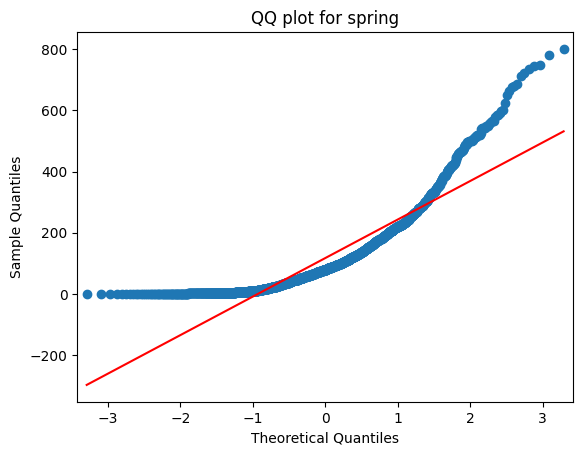

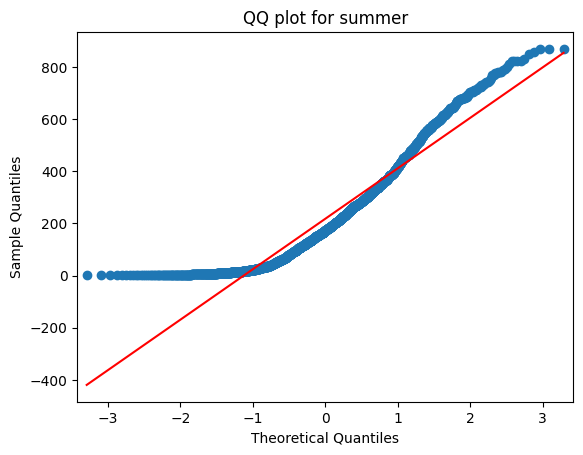

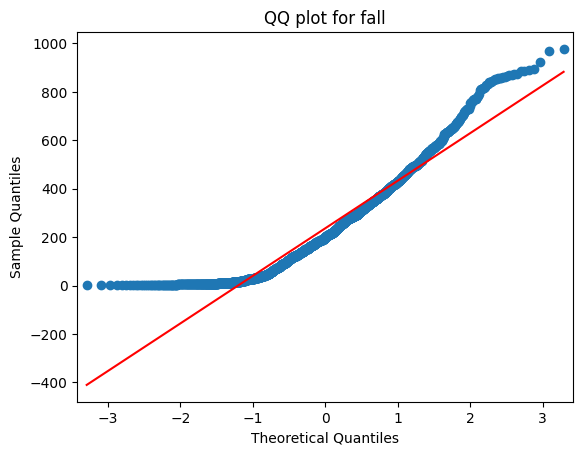

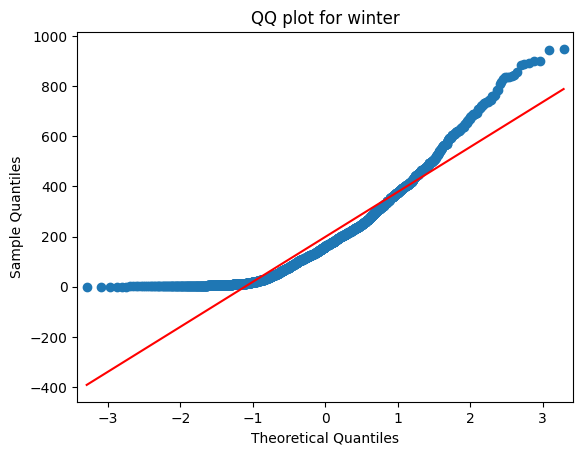

In [324]:
# QQ plot to check the normal distribution
qqplot(data.loc[data['season'] == 1, 'count'].sample(2000),line='s')
plt.title('QQ plot for spring')

qqplot(data.loc[data['season'] == 2, 'count'].sample(2000),line='s')
plt.title('QQ plot for summer')

qqplot(data.loc[data['season'] == 3, 'count'].sample(2000),line='s')
plt.title('QQ plot for fall')

qqplot(data.loc[data['season'] == 4, 'count'].sample(2000),line='s')
plt.title('QQ plot for winter')
plt.show()

#### Conclusion on Distribution

* This is also not a normal distribution so we will first perform krushkal wallis test .

#### Krushkal Wallis Test

In [325]:
# Applying krushkal wallis test to test the hypothesis
spring =data.loc[data['season'] == 1, 'count'].sample(2000)
summer = data.loc[data['season'] == 2, 'count'].sample(2000)
fall =  data.loc[data['season'] == 3, 'count'].sample(2000)
winter =  data.loc[data['season'] == 4, 'count'].sample(2000)

stat, p_value = kruskal(spring,summer,fall,winter)
if p_value < 0.05 :
  print ("Reject the null hypothesis . So, working Day has some effect on the number of bikes rented ")
else :
  print ("Accept the null hypothesis. So , working Day has no effect on the number of bikes rented ")


Reject the null hypothesis . So, working Day has some effect on the number of bikes rented 


#### Yeo-Johnson Transformation

Lets apply yeo johnson transformation to make it normal and then apply f_oneway test

Text(0.5, 1.0, 'QQ plot for winter')

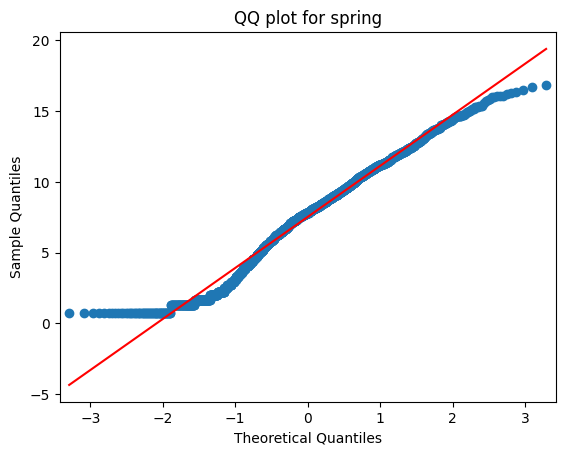

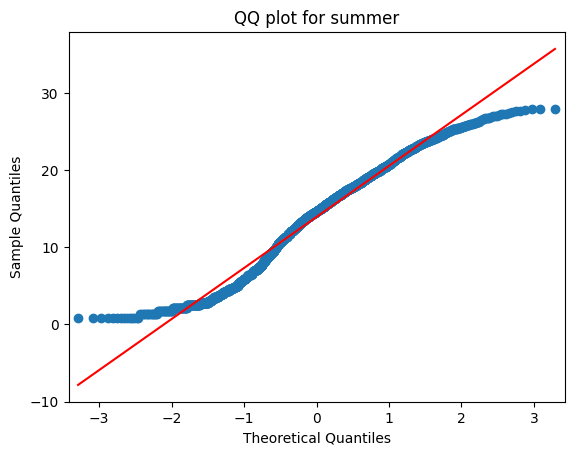

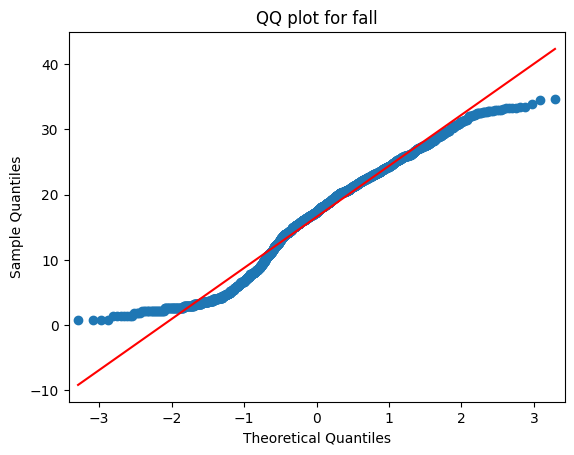

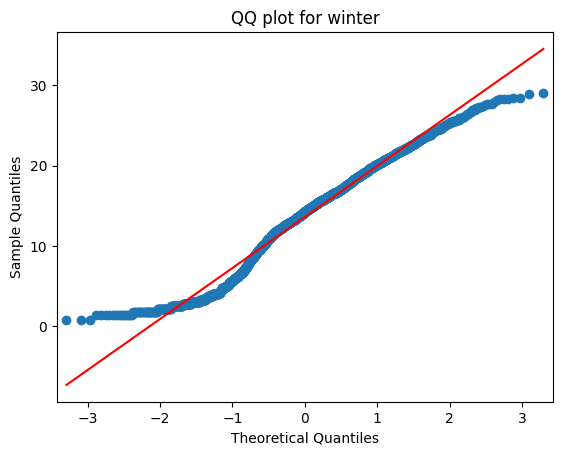

In [326]:
# Applying Yeo-Johnson transformation and then qq plot

from scipy.stats import yeojohnson
season_transformed_1,lambda_1=yeojohnson(data.loc[data['season']==1,'count'].sample(2000))
season_transformed_2,lambda_2=yeojohnson(data.loc[data['season']==2,'count'].sample(2000))
season_transformed_3,lambda_3=yeojohnson(data.loc[data['season']==3,'count'].sample(2000))
season_transformed_4,lambda_4=yeojohnson(data.loc[data['season']==4,'count'].sample(2000))

qqplot(season_transformed_1,line='s')
plt.title('QQ plot for spring')

qqplot(season_transformed_2,line='s')
plt.title('QQ plot for summer')

qqplot(season_transformed_3,line='s')
plt.title('QQ plot for fall')

qqplot(season_transformed_4,line='s')
plt.title('QQ plot for winter')



#### ANNOVA Test

In [327]:
from scipy.stats import f_oneway

In [328]:
## Applying ANNOVA to test the hypothesis

f_stats, p_value = f_oneway(season_transformed_1,season_transformed_2,season_transformed_3,season_transformed_4)
if(p_value<0.05):
  print("Reject the null hypothesis .So, season has some effect on the number of bikes rented")
else:
  print("Accept the null hypothesis .So, season has no effect on the number of bikes rented")


Reject the null hypothesis .So, season has some effect on the number of bikes rented


#### Conclusion
* In both the test we can see that we get to reject the null hypothesis . So we can conclude that there's a significantly different in different seasons.

### Is the number of bikes rented is similar or different in different weather ?





In [329]:
data.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


**Since we only have 1 count for bad weather , so we will not consider that for our analaysis**

***STEP-1*** : Set up Null Hypothesis ( H0 )

---
* **Null Hypothesis ( H0 )** - Mean of bikes rented is same for weather 1,2,3 and 4.

* **Alternate Hypothesis ( HA )** - Mean of bikes rented is different for weather 1,2,3 and 4.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Visual test for normal distribution.
* Shapiro test for normal distribution



***STEP-3*** : Compute the p-value and fix value of alpha.

---

We will be computing the multiple sample anova-test p-value using the **f_oneway** function using scipy.stats.
We set our alpha to be **0.05**

***STEP-4*** : Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

#### Visual test for normal distribution

[]

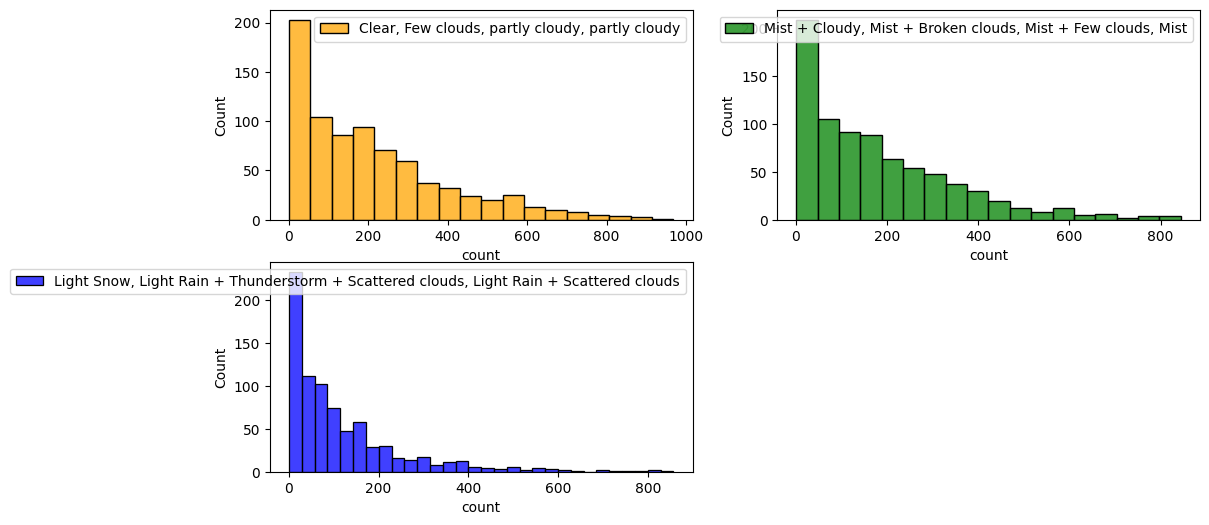

In [330]:
# Histplot to see if data has the normal Distribution

plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data.loc[data['weather'] == 1, 'count'].sample(800), color = 'orange', label = 'Clear, Few clouds, partly cloudy, partly cloudy')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(data.loc[data['weather'] == 2, 'count'].sample(800),color = 'green',  label = 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(data.loc[data['weather'] == 3, 'count'].sample(800),color = 'blue',  label = 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds')
plt.legend()

plt.plot()

__Observation:__
* Doesn't seem to be a normal graph
* Lets test it using shapiro

#### Shapiro test for normal distribution

H0 : **follows normal distribution**

H1 : **does not follow normal distribution**

alpha = 0.05

In [331]:
#Shapiro test for checking the normal distribution
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['weather'] == 1, 'count'].sample(800))
if p_value < 0.05:
  print("Reject the null hypothesis , graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , graph follows normal distribution")

Reject the null hypothesis , graph does not follows normal distribution


In [332]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 2, 'count'].sample(800))
if p_value < 0.05:
  print("Reject the null hypothesis , graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , graph follows normal distribution")

Reject the null hypothesis , graph does not follows normal distribution


In [333]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 3, 'count'].sample(800))
if p_value < 0.05:
  print("Reject the null hypothesis , graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , graph follows normal distribution")

Reject the null hypothesis , graph does not follows normal distribution


#### Conclusion on Distribution
__We can conclude that distribution is not normal__

__so lets first perform krushkal wallis test and then make the graph normal and then perform ANNOVA test__

#### Krushkal Wallis Test

In [334]:
# Applying krushkal wallis test to test the hypothesis
good_weather =data.loc[data['weather'] == 1, 'count'].sample(800)
not_good_weather = data.loc[data['weather'] == 2, 'count'].sample(800)
bad_weather =  data.loc[data['weather'] == 3, 'count'].sample(800)


stat, p_value = kruskal(good_weather,not_good_weather,bad_weather)
if p_value < 0.05 :
  print ("Reject the null hypothesis . So, working Day has some effect on the number of bikes rented ")
else :
  print ("Accept the null hypothesis. So , working Day has no effect on the number of bikes rented ")


Reject the null hypothesis . So, working Day has some effect on the number of bikes rented 


**Observation**
* Krushkal Wallis test has given that there is an effect of weather . Lets now tranform the distribution and then try with annova

#### Yeo-Johnson Transformation

Text(0.5, 1.0, 'QQ plot for 3')

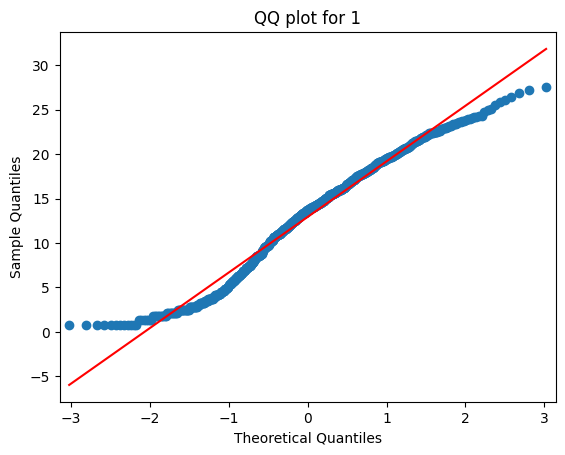

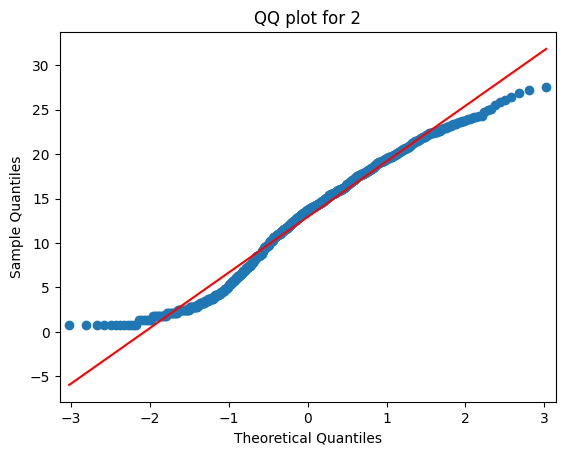

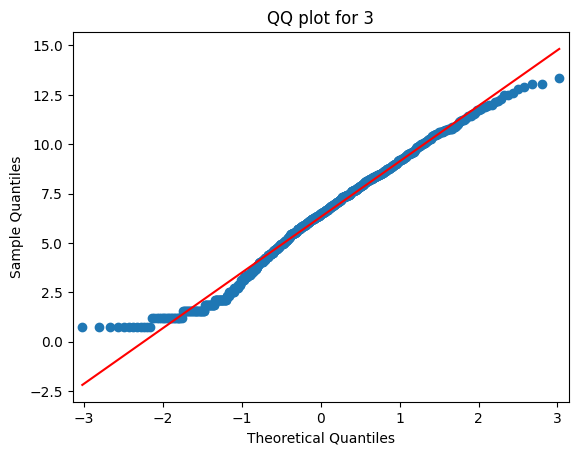

In [335]:
# Applying Yeo-Johnson transformation and then qq plot

from scipy.stats import yeojohnson
weather_transformed_1,lambda_1=yeojohnson(data.loc[data['weather']==1,'count'].sample(800))
weather_transformed_2,lambda_2=yeojohnson(data.loc[data['weather']==2,'count'].sample(800))
weather_transformed_3,lambda_3=yeojohnson(data.loc[data['weather']==3,'count'].sample(800))

qqplot(weather_transformed_1,line='s')
plt.title('QQ plot for 1')

qqplot(weather_transformed_1,line='s')
plt.title('QQ plot for 2')

qqplot(weather_transformed_3,line='s')
plt.title('QQ plot for 3')

#### ANNOVA Test

In [336]:
## Applying AANOVA to test the hypothesis

from scipy.stats import f_oneway
f_stats, p_value = f_oneway(weather_transformed_1,weather_transformed_2,weather_transformed_3)
if(p_value<0.05):
  print("Reject the null hypothesis .So, weather has some effect on the number of bikes rented")
else:
  print("Accept the null hypothesis .So, weather has no effect on the number of bikes rented")


Reject the null hypothesis .So, weather has some effect on the number of bikes rented


#### Conclusion
* In both the test we can see that we get to reject the null hypothesis . So we can conclude that there's a significantly difference in bike rent in different weather.

### Is weather dependent on the season ?





In [337]:
data[['weather', 'season']].describe()

,weather,season
count,10886.000000,10886.000000
mean,1.418427,2.506614
std,0.633839,1.116174
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,4.000000
max,4.000000,4.000000


***STEP-1*** : Set up Null Hypothesis ( H0 )

---
* **Null Hypothesis ( H0 )** - Weather is not dependent of Season.

* **Alternate Hypothesis ( HA )** - Weather is dependent of Season.

***STEP-2*** : Defining Test Stats -

---
* Since both are categorical data, so we will perform *Chi-Square test*



***STEP-3*** : Compute the p-value and fix value of alpha.

---

We will be using the chi2_contigency function using scipy.stats.
We set our alpha to be **0.05**

***STEP-4*** : Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

* We dont need to perfrom any test for distribution as chi-square test is non parametric ;i.e. distribution free.

#### Crosstab

In [338]:
# Creating the cross tab
cross_table = pd.crosstab(index = data['season'],
                          columns = data['weather'],
                          values = data['count'],
                          aggfunc = np.sum)
cross_table

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,NaN
3,470116.0,139386.0,31160.0,NaN
4,356588.0,157191.0,30255.0,NaN


* Since we dont have any data in 4th column so we can reomvve that from our data.


In [339]:
cross_table = pd.crosstab(index = data['season'],
                          columns = data.loc[data['weather'] != 4, 'weather'],
                          values = data['count'],
                          aggfunc = np.sum)
cross_table

weather,1,2,3
season,,,
1,223009,76406,12919
2,426350,134177,27755
3,470116,139386,31160
4,356588,157191,30255


#### Chi-Square Test


In [340]:
# ## Applying Chi-Square to test the hypothesis

from scipy.stats import chi2_contingency
chi_test_stat, pvalue, dof, expected = chi2_contingency(cross_table)
if(pvalue<0.05):
  print("Reject the null hypothesis , there is a dependency of weather on season")
else:
  print("Accept the null hypothesis , there is no dependency of weather on season")


Reject the null hypothesis , there is a dependency of weather on season


#### Conclusion
We can conclude that weather is dependent on the season as per the bike rental data

# Conclusions

- Rental bike counts peak during clear and cloudy weather, followed by misty and rainy conditions. Data for extreme weather is limited.
- Average bike counts are similar on both working and non-working days.
- Weather and season significantly influence bike rental counts.
- Bike rental numbers vary significantly across different weather conditions.
- Weather types 1, 2, and 3 show no significant seasonal dependency in average rental counts.
- Rental bike numbers differ significantly across seasons.

# Recommendation


- **Improve Weather Data Collection**: Enhance data collection for extreme weather conditions to adjust operations accordingly.

- **Time-based Pricing**: Set lower rates during off-peak hours and higher rates during peak hours to balance demand.

- **Seasonal Marketing**: Adjust marketing for high-demand spring and summer months. Offer discounts during these times.

- **Weather-based Promotions**: Offer discounts during favorable weather conditions to boost rentals.

- **User Segmentation**:  Provide loyalty perks for registered users and seamless experience for casual ones.


- **Customer Feedback and Reviews**: Encourage feedback to improve services and meet customer expectations.

- **Social Media Marketing**: Utilize social media to promote services and engage with customers.

- **Special Occasion Discounts**: Offer discounts on environmental awareness days to attract users.